In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#https://en.wikipedia.org/wiki/Vanishing_point

In [2]:
image = cv2.imread('pune-shirdi-highway-1024x576.jpeg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

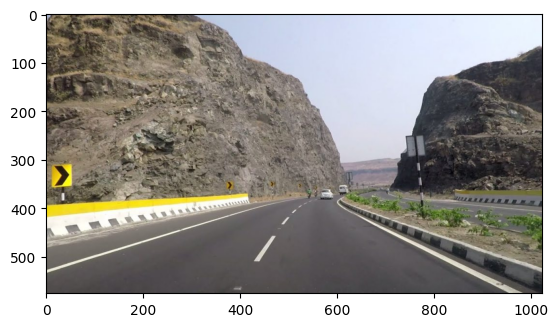

In [3]:
plt.imshow(image)

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [5]:
blurGray = cv2.GaussianBlur(gray, (5, 5), 1)
# Generating Edge image
edgeGray = cv2.Canny(blurGray, 40, 255)

# Finding Lines in the image
lines = cv2.HoughLinesP(edgeGray, 1, np.pi / 180, 50, 10, 15)
lines.shape

(25, 1, 4)

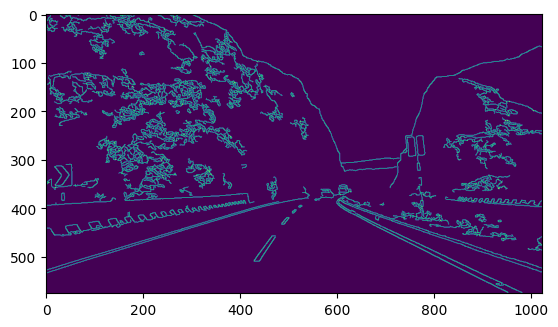

In [6]:
plt.imshow(edgeGray)

In [7]:
_image = image.copy()
for Line in np.squeeze(lines):
            cv2.line(_image, (Line[0], Line[1]), (Line[2], Line[3]), (0, 255, 0), 2)

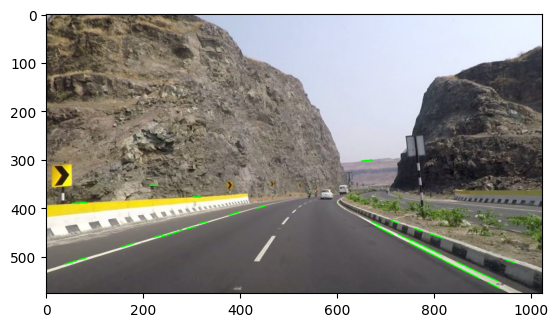

In [8]:
plt.imshow(_image)

In [9]:
def FilterLines(Lines):
    FinalLines = []

    for Line in Lines:
        [[x1, y1, x2, y2]] = Line

        # Calculating equation of the line: y = mx + c
        #TODO
        m = (y2 - y1)/(x2 - x1)
        c = y1 - ((y2 - y1)/(x2 - x1)) * x1


        # theta from SLOPE
        theta = np.degrees(np.arctan(abs(m)))     #TODO

        # Rejecting lines of slope near to 0 degree or 90 degree and storing others
        if REJECT_DEGREE_TH <= abs(theta) <= (90 - REJECT_DEGREE_TH):
            l = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)     #TODO   # length of the line
            FinalLines.append([x1, y1, x2, y2, m, c, l])


    # Removing extra lines
    # (we might get many lines, so we are going to take only longest 15 lines
    # for further computation because more than this number of lines will only
    # contribute towards slowing down of our algo.)
    if len(FinalLines) > 15:
        #SORT on length
        FinalLines = FinalLines[:15]

    return FinalLines

In [10]:
REJECT_DEGREE_TH = 4.0

In [11]:
lines = FilterLines(lines)

In [12]:
np.asarray(lines).shape

(15, 7)

In [13]:
def GetVanishingPoint(Lines):
    # We will apply RANSAC inspired algorithm for this. We will take combination
    # of 2 lines one by one, find their intersection point, and calculate the
    # total error(loss) of that point. Error of the point means root of sum of
    # squares of distance of that point from each line.
    VanishingPoint = None
    MinError = 100000000000

    for i in range(len(Lines)):
        for j in range(i+1, len(Lines)):
            m1, c1 = Lines[i][4], Lines[i][5]   # a -> m1 ; b -> c1
            m2, c2 = Lines[j][4], Lines[j][5]   # c -> m2 ; d -> c2

            #TODO GET THE INTERSECTION
            if m1 != m2:
              x0 = (c2 - c1) / (m1 - m2)
              y0 = m1 * x0 + c1

              err = 0
              for k in range(len(Lines)):
                  #TODO GET THE ERROR
                  err += np.abs(y0 - (Lines[k][4]*x0) - Lines[k][5])/np.sqrt(1+Lines[k][4]**2)

              err = math.sqrt(err)

              if MinError > err:
                  MinError = err
                  VanishingPoint = [x0, y0]

    return VanishingPoint

In [14]:
vanishingPoint = GetVanishingPoint(lines)
vanishingPoint

[544.0380348652932, 369.6561014263075]

In [15]:
_=cv2.circle(_image, (int(vanishingPoint[0]), int(vanishingPoint[1])), 10, (0, 0, 255), -1)


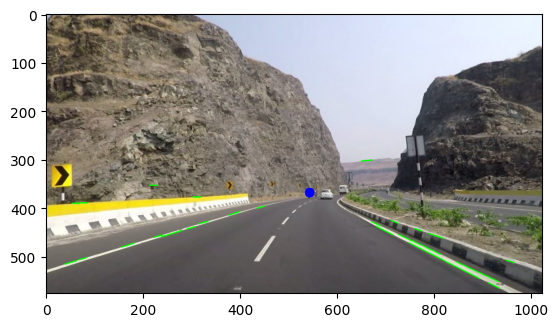

In [16]:
plt.imshow(_image)

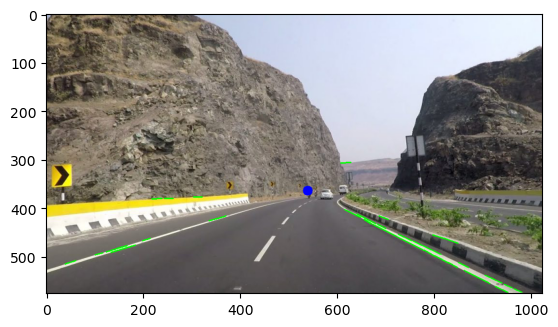

In [ ]:
plt.imshow(_image)